In [1]:
from ast import literal_eval

import pandas as pd

In [2]:
credits = pd.read_csv('data/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [3]:
pd.DataFrame.from_dict(literal_eval(credits.cast[0]))

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg
6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg
7,26,Andy (voice),52fe4284c3a36847f8024fc1,0,1116442,John Morris,7,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg
8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg
9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg


In [4]:
%%time

cast = []
for i in credits.id:
    df_dict = literal_eval(credits.loc[credits['id'] == i].cast.values[0])
    if len(df_dict) > 0:
        df = pd.DataFrame.from_dict(df_dict)[['id','name']]
        df.columns = ['actor_id','actor_name']
        df['id'] = i
        cast.append(df)

cast = pd.concat(cast, ignore_index=True)
cast.head()

CPU times: user 2min 36s, sys: 276 ms, total: 2min 36s
Wall time: 2min 36s


,actor_id,actor_name,id
0,31,Tom Hanks,862
1,12898,Tim Allen,862
2,7167,Don Rickles,862
3,12899,Jim Varney,862
4,12900,Wallace Shawn,862


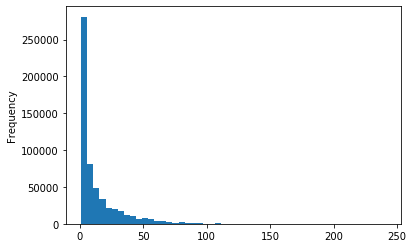

In [14]:
cast['num_movies'] = cast.groupby('actor_id')['actor_id'].transform('count')
cast['num_movies'].plot.hist(bins=50)

In [15]:
cast.loc[cast.num_movies >= 10].to_csv('data/movie_actor.csv', index=False)

In [6]:
pd.DataFrame.from_dict(literal_eval(credits.crew[0]))

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
101,589216c19251412dc2009cb9,Sound,1,1748724,Assistant Sound Editor,Susan Sanford,None
102,589216ccc3a3680973009274,Sound,0,1748725,Assistant Sound Editor,Susan Popovic,None
103,589216d79251412dc8009aa0,Sound,0,8067,Assistant Sound Editor,Dan Engstrom,None
104,589216e49251412dcd009a4f,Production,1,7902,Casting Consultant,Ruth Lambert,None


In [7]:
%%time

crew = []
for i in credits.id:
    df_dict = literal_eval(credits.loc[credits['id'] == i].crew.values[0])
    if len(df_dict) > 0:
        df = pd.DataFrame.from_dict(df_dict)[['id','job','name']]
        df.columns = ['person_id','job','person_name']
        df['id'] = i
        crew.append(df)

crew = pd.concat(crew, ignore_index=True)
crew.head()

CPU times: user 2min 32s, sys: 620 ms, total: 2min 33s
Wall time: 2min 33s


,person_id,job,person_name,id
0,7879,Director,John Lasseter,862
1,12891,Screenplay,Joss Whedon,862
2,7,Screenplay,Andrew Stanton,862
3,12892,Screenplay,Joel Cohen,862
4,12893,Screenplay,Alec Sokolow,862


In [18]:
crew['job'].value_counts()

Director                    49048
Producer                    43555
Writer                      30431
Screenplay                  25163
Editor                      23800
                            ...  
Underwater Gaffer               1
Lead Character Designer         1
Temp Sound Editor               1
Cloth Setup                     1
Opening/Ending Animation        1
Name: job, Length: 456, dtype: int64

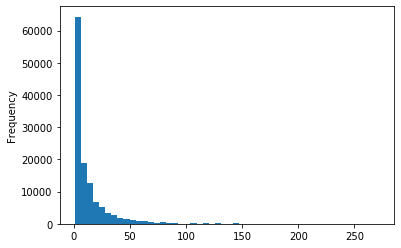

In [20]:
crew['num_movies'] = crew.groupby('person_id')['person_id'].transform('count')
jobs = ['director','producer','writer']
crew.loc[crew['job'].str.lower().isin(jobs), 'num_movies'].plot.hist(bins=50)

In [23]:
crew.loc[crew['job'].str.lower().isin(jobs) & (crew['num_movies'] >= 10)].to_csv('data/movie_producer.csv', index=False)

In [9]:
movies = pd.read_csv('data/movies_metadata.csv')
movies.head()

/home/recommender/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
pd.DataFrame.from_dict(literal_eval(movies.genres[0]))

,id,name
0,16,Animation
1,35,Comedy
2,10751,Family


In [11]:
%%time

genre = []
for i in movies.id:
    df_dict = literal_eval(movies.loc[movies['id'] == i].genres.values[0])
    if len(df_dict) > 0:
        df = pd.DataFrame.from_dict(df_dict)[['id','name']]
        df.columns = ['genre_id','genre_name']
        df['id'] = i
        genre.append(df)

genre = pd.concat(genre, ignore_index=True)
genre.head()

CPU times: user 4min 30s, sys: 392 ms, total: 4min 30s
Wall time: 4min 30s


,genre_id,genre_name,id
0,16,Animation,862
1,35,Comedy,862
2,10751,Family,862
3,12,Adventure,8844
4,14,Fantasy,8844


In [12]:
genre.to_csv('data/movie_genre.csv', index=False)

In [24]:
keywords = pd.read_csv('data/keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [25]:
pd.DataFrame.from_dict(literal_eval(keywords.keywords[0]))

,id,name
0,931,jealousy
1,4290,toy
2,5202,boy
3,6054,friendship
4,9713,friends
5,9823,rivalry
6,165503,boy next door
7,170722,new toy
8,187065,toy comes to life


In [28]:
' '.join([i['name'] for i in literal_eval(keywords.keywords[0])])

'jealousy toy boy friendship friends rivalry boy next door new toy toy comes to life'

In [33]:
%%time

keys = []
for i in keywords.id:
    df_dict = literal_eval(keywords.loc[keywords['id'] == i].keywords.values[0])
    if len(df_dict) > 0:
        kw = ' '.join([i['name'] for i in df_dict])
        df = pd.DataFrame(data={'keywords': [kw]})
        df['id'] = i
        keys.append(df)

keys = pd.concat(keys, ignore_index=True)
keys.head()

CPU times: user 59.5 s, sys: 112 ms, total: 59.6 s
Wall time: 59.6 s


,keywords,id
0,jealousy toy boy friendship friends rivalry bo...,862
1,board game disappearance based on children's b...,8844
2,fishing best friend duringcreditsstinger old men,15602
3,based on novel interracial relationship single...,31357
4,baby midlife crisis confidence aging daughter ...,11862


In [34]:
keys.to_csv('data/movie_keywords.csv', index=False)

In [82]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [83]:
tags_groups = tags[['movieId','tag']].dropna().groupby('movieId', sort=False)
tags = tags_groups['tag'].agg(tags=lambda x: ' '.join(x)).reset_index(drop=False)
tags.columns = ['id', 'tags']
tags.head()

,id,tags
0,110,epic Medieval overrated Oscar (Best Picture) e...
1,260,sci-fi space action classic sci-fi Harrison Fo...
2,318,imdb top 250 justice story line hope inspirati...
3,480,Dinosaurs dinosaurs action thriller dinosaurs ...
4,593,psychothriller brilliant exploratory ligne de ...


In [84]:
tags.to_csv('data/movie_tags.csv', index=False)

In [ ]:
movie_ratings # users with more than 5 votes
movie_info # text info (merge all) and movies with more than 100 votes